# Modelos de difusão

In [ ]:
import networkx as nx
import numpy  as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from copy import deepcopy

## Modelo SIR

No modelo SIR, os nós podem se encontrar em três estados: suscetíveis (S), infectados (I) ou removidos (R).

Os estados S e I são como no modelo SI, e o estado R é atingido após um nó passar pelo estado infectado e se tornar imune a doença.

No modelo SIR, além do parâmetro de contágio $\beta$, existe um outro parâmetro $\gamma$ que modela a velocidade com que um indivíduo se recupera da doença.

Em um modelo de tempo discreto, $\gamma$ representa a probabilidade de um indivíduo se recuperar a cada instante de tempo, tendo o tempo de infecção uma distribuição geométrica neste caso.

Em um modelo contínuo, o tempo que um indivíduo permanece infectado segue uma distribuição exponencial com parâmetro $\gamma$.

### Exemplo

A simulação do modelo SIR em tempo discreto é similar à do modelo SI, porém com mais um estado. 

No seguinte script, apresentamos este tipo de simulação, usando três valores de $\gamma$ e um só valor de $\beta$. 

Considere uma rede de Barabási-Albert com 1000 nós e três ligações por vértice, com aproximadamente um $10\%$ dos vértices inicialmente infectados.

In [32]:
def numinf(g):
    num = 0
    for n in g.nodes:
        if g.nodes[n]['estado'] == 1:
            num += 1

    return num

In [33]:
def numinfviz(g,n):
    num = 0
    for m in nx.neighbors(g,n):
        if g.nodes[m]['estado'] == 1:
            num += 1
    
    return num

In [34]:
def sir(g,beta,gamma,M,rng):
    
    delta = [0]*(M+1)
    delta[0] = numinf(g)/g.order()

    for k in range(M):
        for n in g.nodes:
            # o vértice é suscetível?
            if g.nodes[n]['estado'] == 0:
                p = (1-(1-beta)**numinfviz(g,n)) # probabilidade de contágio
                if rng.random() < p: # o vértice contagia-se?
                    g.nodes[n]['estado-prox'] =  1
                else:
                    g.nodes[n]['estado-prox'] =  0
            elif g.nodes[n]['estado'] == 1: # vértice infectado
                if rng.random() < gamma:
                    g.nodes[n]['estado-prox'] =  2
                else:
                    g.nodes[n]['estado-prox'] =  1
        num = 0
        for n in g.nodes:
            #um vétice em estado 2 (R), fica no estado 2
            if (g.nodes[n]['estado'] == 0) or (g.nodes[n]['estado'] == 1):
                g.nodes[n]['estado'] = g.nodes[n]['estado-prox']
            if g.nodes[n]['estado'] == 1:
                num += 1
        delta[k+1] = num/g.order()
        
    return delta


In [35]:
def init(g,p,rng):
    for n in g.nodes:
        g.nodes[n]['estado-prox'] = 0
        if rng.random() < p:
            g.nodes[n]['estado'] = 1 #I = 1
        else:
            g.nodes[n]['estado'] = 0 #S = 0

In [36]:
# rede barabasi_albert_graph

G3 = nx.barabasi_albert_graph(1000,3)

G10 = nx.barabasi_albert_graph(1000,10)

G1 = nx.barabasi_albert_graph(1000,1)

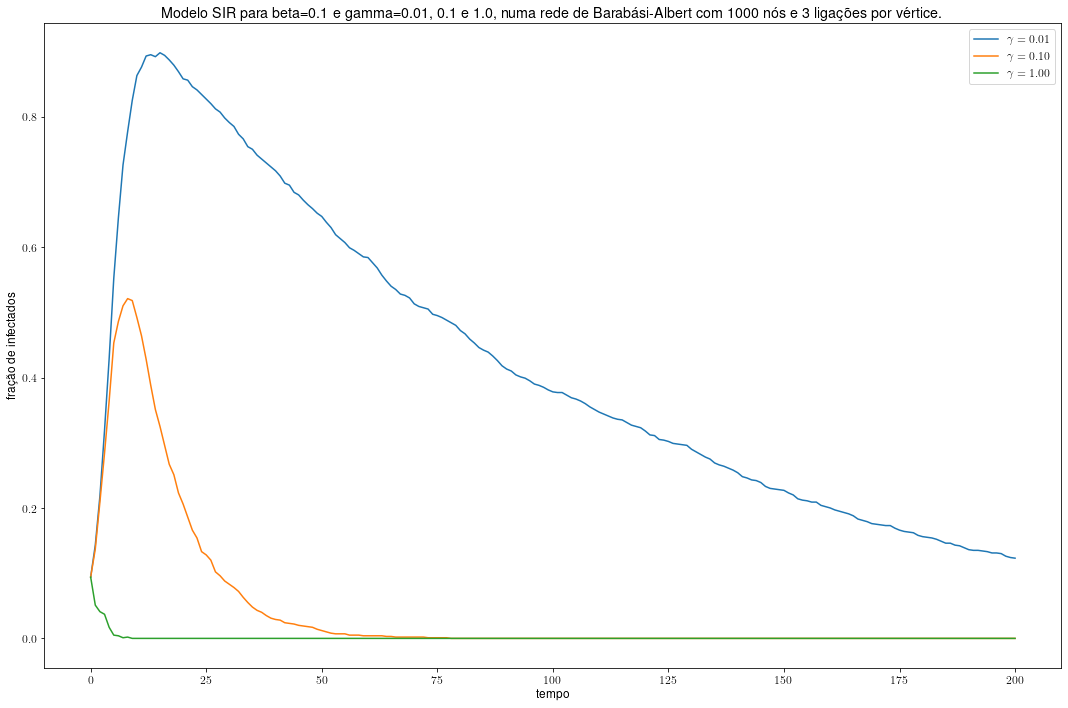

In [37]:
# Para os três valores de $\gamma$, a fração de vértices infectados tende a zero porque os nós recuperam-se. 
# Porém, o tempo de infecção para valores de $\gamma$ maiores, observa-se que o número de infectados atinge um máximo

# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos vértices estão inicialmente infectados
init(G3,0.1,rng)

G = deepcopy(G3)
dens1 = sir(G,0.1,0.01,200,rng)

G = deepcopy(G3)
dens2 = sir(G,0.1,0.10,200,rng)

G = deepcopy(G3)
dens3 = sir(G,0.1,1.00,200,rng)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 12,
    "font.sans-serif": "Helvetica",
    })

plt.close('all')
fig = plt.subplots(1,1,figsize=(15,10))
plt.plot(dens1,label=r'$\gamma = 0.01$')
plt.plot(dens2,label=r'$\gamma = 0.10$')
plt.plot(dens3,label=r'$\gamma = 1.00$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SIR para beta=0.1 e gamma=0.01, 0.1 e 1.0, numa rede de Barabási-Albert com 1000 nós e 3 ligações por vértice.')
plt.tight_layout()

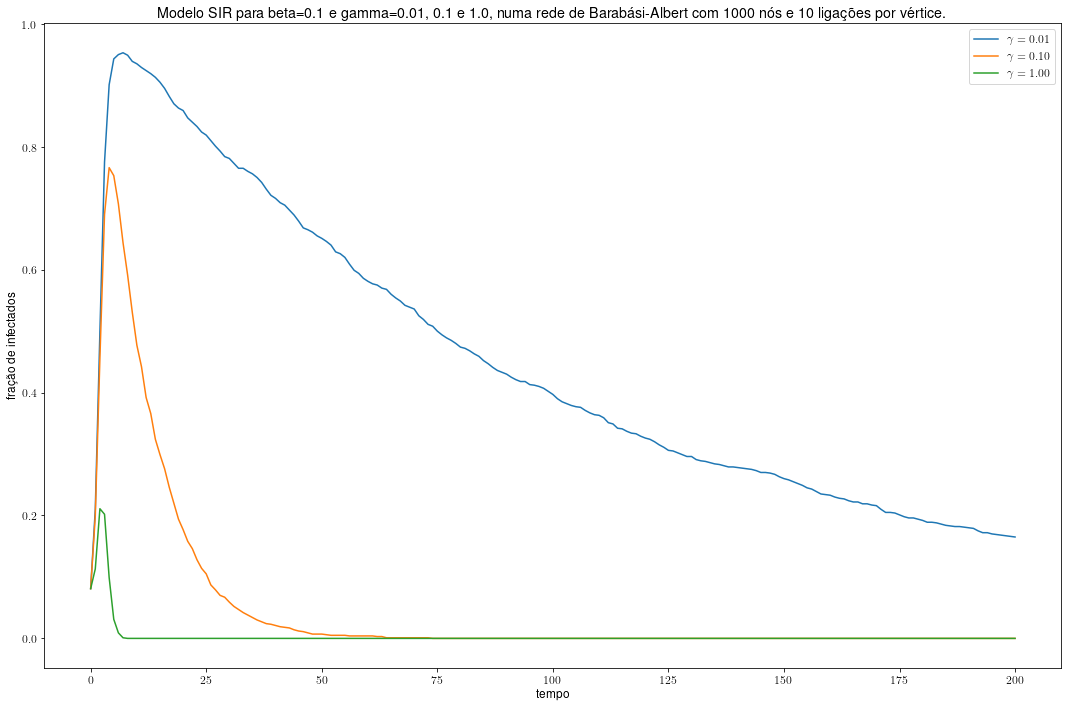

In [38]:
# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos vértices estão inicialmente infectados
init(G10,0.1,rng)

G = deepcopy(G10)
dens1 = sir(G,0.1,0.01,200,rng)

G = deepcopy(G10)
dens2 = sir(G,0.1,0.10,200,rng)

G = deepcopy(G10)
dens3 = sir(G,0.1,1.00,200,rng)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 12,
    "font.sans-serif": "Helvetica",
    })

plt.close('all')
fig = plt.subplots(1,1,figsize=(15,10))
plt.plot(dens1,label=r'$\gamma = 0.01$')
plt.plot(dens2,label=r'$\gamma = 0.10$')
plt.plot(dens3,label=r'$\gamma = 1.00$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SIR para beta=0.1 e gamma=0.01, 0.1 e 1.0, numa rede de Barabási-Albert com 1000 nós e 10 ligações por vértice.')
plt.tight_layout()

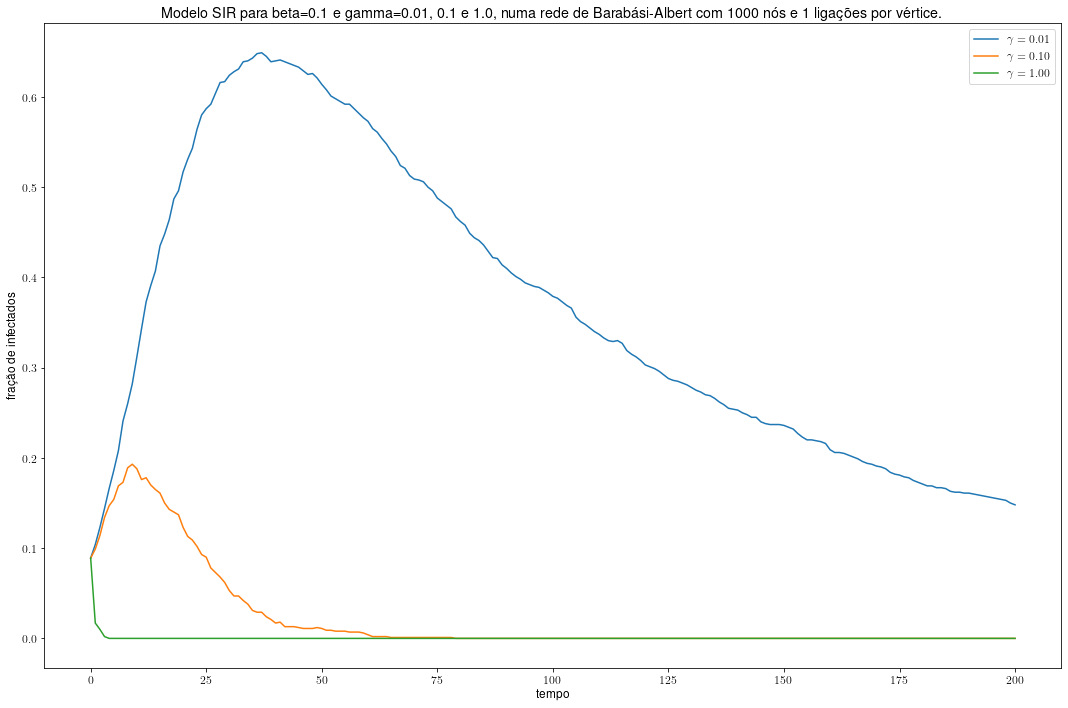

In [39]:
# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos vértices estão inicialmente infectados
init(G1,0.1,rng)

G = deepcopy(G1)
dens1 = sir(G,0.1,0.01,200,rng)

G = deepcopy(G1)
dens2 = sir(G,0.1,0.10,200,rng)

G = deepcopy(G1)
dens3 = sir(G,0.1,1.00,200,rng)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 12,
    "font.sans-serif": "Helvetica",
    })

plt.close('all')
fig = plt.subplots(1,1,figsize=(15,10))
plt.plot(dens1,label=r'$\gamma = 0.01$')
plt.plot(dens2,label=r'$\gamma = 0.10$')
plt.plot(dens3,label=r'$\gamma = 1.00$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SIR para beta=0.1 e gamma=0.01, 0.1 e 1.0, numa rede de Barabási-Albert com 1000 nós e 1 ligações por vértice.')
plt.tight_layout()

O número máximo de vértices infectados depende do valor de $q$, como o seguinte script mostra

In [40]:
q = np.linspace(1/11,1,21)
den = np.zeros_like(q)

for k in range(q.shape[0]):
    for i in range(100):
        g = nx.barabasi_albert_graph(1000,3)
        init(g,0.1,rng)
        dens = sir(g,0.1,(1-q[k])/q[k]*0.1,200,rng)
        den[k] += np.max(dens)
    print(k,den[k])

0 9.889999999999999
1 10.500000000000004
2 14.305999999999997
3 19.577
4 24.878999999999987
5 30.349000000000004
6 35.704
7 40.088
8 45.211
9 50.073000000000015
10 54.504000000000005
11 59.22
12 63.205999999999996
13 67.57500000000002
14 71.747
15 75.91200000000002
16 80.33300000000001
17 84.57599999999995
18 88.79100000000003
19 93.87500000000001
20 100.0


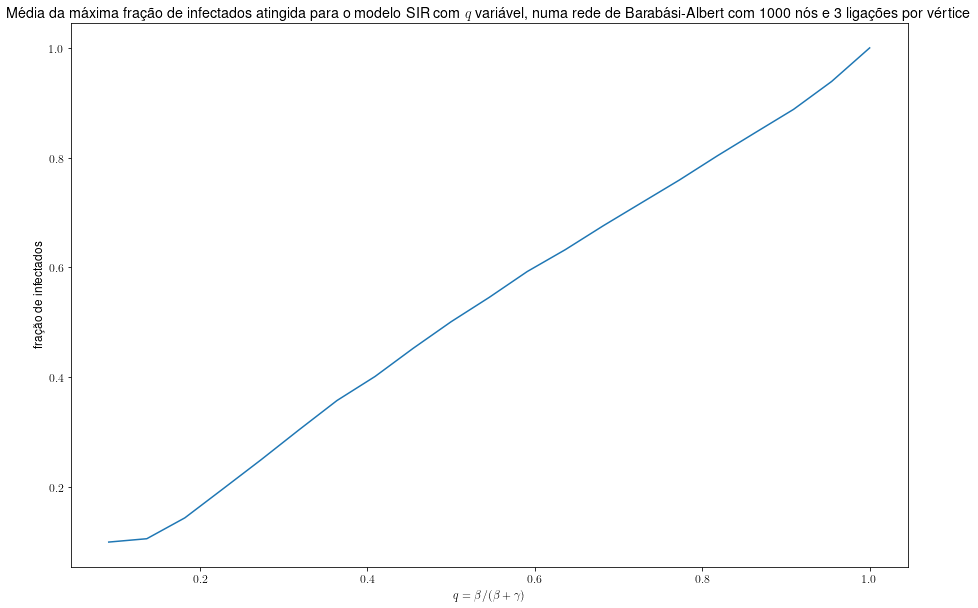

In [41]:
# apresenta a média(100 simulações) da fração de infectados máxima atingida para cada valor de q.

den = den/100

fig = plt.subplots(1,1,figsize=(15,10))

plt.plot(q,den)
plt.ylabel('fração de infectados')
plt.xlabel(r'$q = \beta/(\beta+\gamma)$')
plt.title('Média da máxima fração de infectados atingida para o modelo SIR com $q$ variável, numa rede de Barabási-Albert com 1000 nós e 3 ligações por vértice')
plt.show()

### Exemplo

No caso do modelo SI, apresentamos duas maneiras de frear o espalhamento da infecção, a remoção de arestas e a remoção de vértices. 

No modelo SIR, há uma terceira maneira que no caso de uma doença seria equivalente à vacinação, iniciar com alguns vértices no estado R. 

O script a seguir avalia a influência da fração de vértices inicialmente no estado R. 

Os vértices vacinados são escolhidos de duas maneiras, ao acaso e começando com os vértices de maior grau. 

Observe-se que a vacinação é anterior à infecção. 

In [42]:
def initr(g,p,rng):
    for n in g.nodes:
        if rng.random() < p:
            g.nodes[n]['estado'] = 2 #R = 2
            g.nodes[n]['estado-prox'] = 2
        else:
            g.nodes[n]['estado'] = 0 #S = 0
            g.nodes[n]['estado-prox'] = 0

In [43]:
def initrl(g,gr,p,rng):
    nx.set_node_attributes(g, 0, name='estado')
    nx.set_node_attributes(g, 0, name='estado-prox')

    K = rng.binomial(g.order(),p)
    k = 0
    for n in gr:
        if k < K:
            g.nodes[n]['estado'] = 2 #R = 2
            g.nodes[n]['estado-prox'] = 2
            k += 1
        else:
            break

In [44]:
def initi(g,p,rng):
    for n in g.nodes:
        # um vértice no estado R não pode-se infectar
        if g.nodes[n]['estado'] == 2:
            continue
        if rng.random() < p:
            g.nodes[n]['estado'] = 1 #I = 1
            g.nodes[n]['estado-prox'] = 0
        else:
            g.nodes[n]['estado'] = 0 #S = 0
            g.nodes[n]['estado-prox'] = 0

In [45]:
p = np.linspace(0,0.5,10)
den1 = np.zeros_like(p)
den2 = np.zeros_like(p)

for k in range(p.shape[0]):
    for i in range(100):
        g = nx.barabasi_albert_graph(1000,3)
        G = deepcopy(g)
        initr(g,p[k],rng)
        initi(g,0.1,rng)
        dens = sir(g,0.1,0.01,200,rng)
        den1[k] += np.max(dens)
        g = deepcopy(G)
        cen = dict(g.degree)
        gr = dict(sorted(cen.items(), key=lambda item: item[1], reverse=True))
        initrl(g,gr,p[k],rng)
        initi(g,0.1,rng)
        dens = sir(g,0.1,0.01,200,rng)
        den2[k] += np.max(dens)
                
    print(k,den1[k],den2[k])

0 88.82300000000001 88.95400000000008
1 83.084 74.655
2 77.339 61.649999999999984
3 71.75300000000001 46.753
4 65.68599999999999 29.975000000000005
5 59.99699999999999 19.20599999999999
6 53.969999999999985 12.841000000000003
7 48.50099999999998 8.981
8 42.05599999999998 7.159000000000004
9 36.037000000000006 5.887999999999999


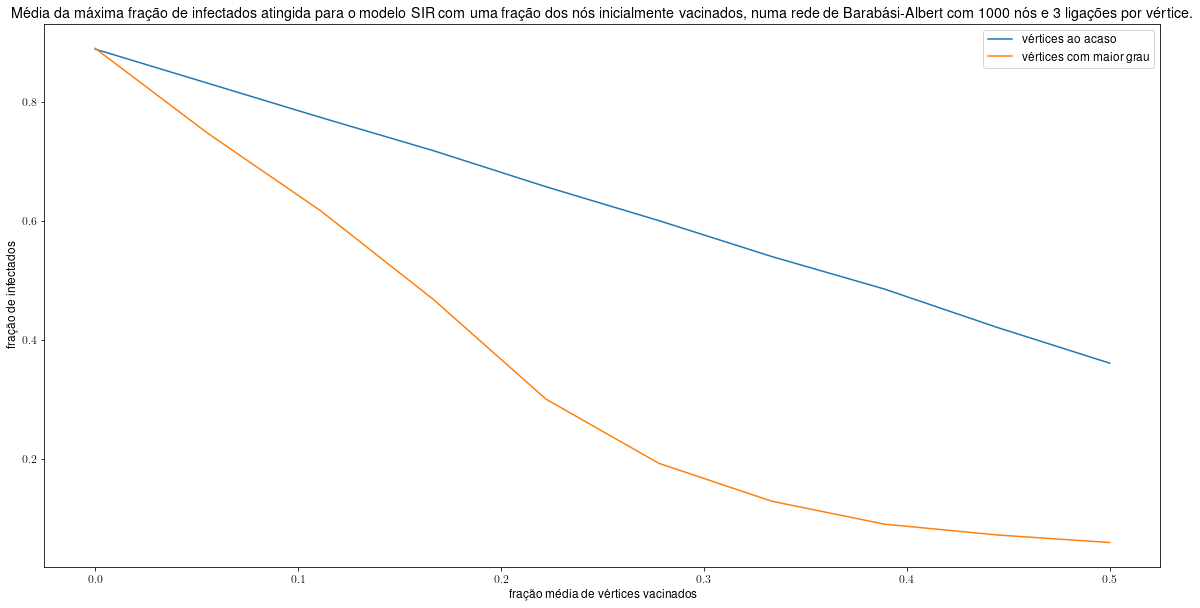

In [46]:
# mostra que escolher os vértices prestando atenção aos graus produz melhores resultados, isto é, um menor número de nós infectados.

den1 = den1/100
den2 = den2/100

fig = plt.subplots(1,1,figsize=(20,10))

plt.plot(p,den1, label='vértices ao acaso')
plt.plot(p,den2, label='vértices com maior grau')
plt.legend()
plt.xlabel('fração média de vértices vacinados')
plt.ylabel('fração de infectados')
plt.title('Média da máxima fração de infectados atingida para o modelo SIR com uma fração dos nós inicialmente vacinados, numa rede de Barabási-Albert com 1000 nós e 3 ligações por vértice.')
plt.show()